In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances_argmin_min
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
mpl.style.use('bmh')  
plt.style.use('seaborn')
from google.colab import drive
drive.mount('/content/gdrive')

%cd '/content/gdrive/MyDrive'

<ipython-input-1-39bd43b99c7e>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive


In [ ]:
df_AMZN_origin = pd.read_csv ('/content/gdrive/MyDrive/Colab Notebooks/Amazon Sales FY2020-21.csv')
df_AMZN_origin.head()



<ipython-input-2-2306aaf3bb88>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_AMZN_origin = pd.read_csv ('/content/gdrive/MyDrive/Colab Notebooks/Amazon Sales FY2020-21.csv')


,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,Sign in date,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,01/10/2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,01/10/2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,01/10/2020,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,01/10/2020,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,13/11/2020,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


# PROYECTO FINAL CURSO DATA SCIENCE CODERHOUSE 2023 

# INTRODUCCIÓN.

El presente trabajo consiste en la elección y posterior puesta en práctica de un determinado tipo de algoritmo -supervisado o no-, con el fin de aprovechar los valiosos recursos y beneficios de la ciencia aplicada a los datos. En este caso, el dataset utilizado se ha obtenido de la plataforma Kaggle, y la audiencia a la que está destinada el trabajo incluye desde una persona en particular, hasta pequeños o grandes grupos de personas o incluso empresas, que estén interesadas sobre todo en el business inteligence. 

A lo largo del trabajo se econtrará el desarrollo paso por paso, como así también aparecerán conclusiones preliminares o puntos de vista sobre el avance del mismo y de las hipótesis trabajadas. A grandes rasgos, se puede decir que el objetivo final es la segmentación (clustering) de los clientes del mundialmente conocido e-comerce Amazon.

#Con la ayuda de las visualizaciones de Python, se ha intentado descubrir o identificar ciertos patrones con respecto a las ventas del e-comerce chino Amazon, durante los años 2020 y 2021. 
#Se ha utilizado una gran variedad de gráficos, ya que dependiendo de las variables que se utiliza, algunos son más eficientes que otros. Los datos o variables más utilizados han sido:
* Total de ventas
* Cantidad de pedidos 
* Variables de tiempo (semanas, meses, años)
* Categorías
* Edad de los consumidores
* Género
* Estados y regiones (geográficos) 

In [ ]:
df_AMZN.index = df_AMZN['item_id']
df_AMZN = df_AMZN.drop ('item_id', axis = 'columns')

In [ ]:
df_AMZN.head()

,order_id,order_date,status,sku,qty_ordered,price,value,discount_amount,total,category,...,Sign in date,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
item_id,,,,,,,,,,,,,,,,,,,,,
574772,100354678,01/10/2020,received,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,Men's Fashion,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
574774,100354678,01/10/2020,received,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,Men's Fashion,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
574777,100354680,01/10/2020,complete,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,Men's Fashion,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
574779,100354680,01/10/2020,complete,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,Men's Fashion,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
595185,100367357,13/11/2020,received,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,Men's Fashion,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [ ]:
x = df_AMZN.index
y = df_AMZN['qty_ordered']
y

item_id
574772    21
574774    11
574777     9
574779     9
595185     2
          ..
905179     2
905191     2
905200     2
905202     2
905205     2
Name: qty_ordered, Length: 286392, dtype: int64

In [ ]:
df_AMZN.isnull().value_counts()

order_id  order_date  status  sku    qty_ordered  price  value  discount_amount  total  category  payment_method  bi_st  cust_id  year   month  ref_num  Name Prefix  First Name  Middle Initial  Last Name  Gender  age    full_name  E Mail  Sign in date  Phone No.   Place Name  County  City   State  Zip    Region  User Name  Discount_Percent
False     False       False   False  False        False  False  False            False  False     False           False  False    False  False  False    False        False       False           False      False   False  False      False   False         False       False       False   False  False  False  False   False      False               286392
dtype: int64

In [ ]:
df_AMZN.head()

,order_id,order_date,status,sku,qty_ordered,price,value,discount_amount,total,category,...,Sign in date,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
item_id,,,,,,,,,,,,,,,,,,,,,
574772,100354678,01/10/2020,received,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,Men's Fashion,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
574774,100354678,01/10/2020,received,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,Men's Fashion,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
574777,100354680,01/10/2020,complete,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,Men's Fashion,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
574779,100354680,01/10/2020,complete,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,Men's Fashion,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
595185,100367357,13/11/2020,received,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,Men's Fashion,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [ ]:
df_AMZN['value'].dtype

dtype('float64')

In [ ]:
df_AMZN['order_date'].dtype

dtype('O')

In [ ]:
df_AMZN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286392 entries, 574772 to 905205
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   sku               286392 non-null  object 
 4   qty_ordered       286392 non-null  int64  
 5   price             286392 non-null  float64
 6   value             286392 non-null  float64
 7   discount_amount   286392 non-null  float64
 8   total             286392 non-null  float64
 9   category          286392 non-null  object 
 10  payment_method    286392 non-null  object 
 11  bi_st             286392 non-null  object 
 12  cust_id           286392 non-null  int64  
 13  year              286392 non-null  int64  
 14  month             286392 non-null  object 
 15  ref_num           286392 non-null  int64  
 16  Name Prefix    

In [ ]:
df_AMZN['order_date'] = pd.to_datetime(df_AMZN['order_date'])

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/11/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '21/10/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/12/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '28/12/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime

In [ ]:
# Extraer mes de order_date
df_AMZN['Mes'] = df_AMZN['order_date'].dt.month

In [ ]:
# Agrupar por mes las ventas
df_AMZN_mes = df_AMZN.groupby('Mes').sum()

In [ ]:
df_AMZN_mes

,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent
Mes,,,,,,,,,,,
1,66954,1.132965e+07,1.358939e+07,9.495211e+05,1.263987e+07,1314960012,38689060,10680028752,899404,946737389,95141.640058
2,31820,5.909050e+06,6.400032e+06,1.876318e+05,6.212400e+06,666022305,20235500,5672257142,467223,504473869,29467.504623
3,92355,2.543737e+07,2.812228e+07,2.290738e+06,2.583155e+07,2026508821,54588343,14974344129,1240402,1355671035,122534.072354
4,143187,2.392438e+07,3.314348e+07,2.232363e+06,3.091112e+07,3100467403,74604601,20507482935,1728572,1854717818,161451.207440
5,43380,9.319589e+06,1.038650e+07,4.131741e+05,9.973325e+06,1062668853,28242474,7890077702,654625,697362384,45240.082399
6,83452,2.631612e+07,2.327854e+07,1.542141e+06,2.173640e+07,1830463795,47988332,13509481064,1100557,1189881479,167669.513090
7,41366,1.563843e+07,1.459422e+07,3.714613e+05,1.422276e+07,1100413882,28642377,7908591559,653545,714059196,54016.403237
8,34648,1.485135e+07,1.770065e+07,1.709248e+05,1.752973e+07,996191629,24933903,6974310733,571882,606863729,33497.964919
9,48582,1.414358e+07,1.251126e+07,5.935394e+05,1.191772e+07,1124752961,29240997,8155345009,670085,704798591,79429.700337


In [ ]:
df_AMZN.head()

,order_id,order_date,status,sku,qty_ordered,price,value,discount_amount,total,category,...,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent,Mes
item_id,,,,,,,,,,,,,,,,,,,,,
574772,100354678,2020-01-10,received,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,Men's Fashion,...,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,1
574774,100354678,2020-01-10,received,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,Men's Fashion,...,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,1
574777,100354680,2020-01-10,complete,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,Men's Fashion,...,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,1
574779,100354680,2020-01-10,complete,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,Men's Fashion,...,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,1
595185,100367357,2020-11-13,received,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,Men's Fashion,...,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,11


In [ ]:
# Total ventas multiplicando precio del item por cantidad vendida
df_AMZN['Total_Ventas'] = df_AMZN['qty_ordered'] * df_AMZN['price']

In [ ]:
# Resetear index en el df_AMZN_mes 
df_AMZN_mes = df_AMZN_mes.reset_index()

In [ ]:
df_AMZN_mes

,Mes,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent
0,1,66954,1.132965e+07,1.358939e+07,9.495211e+05,1.263987e+07,1314960012,38689060,10680028752,899404,946737389,95141.640058
1,2,31820,5.909050e+06,6.400032e+06,1.876318e+05,6.212400e+06,666022305,20235500,5672257142,467223,504473869,29467.504623
2,3,92355,2.543737e+07,2.812228e+07,2.290738e+06,2.583155e+07,2026508821,54588343,14974344129,1240402,1355671035,122534.072354
3,4,143187,2.392438e+07,3.314348e+07,2.232363e+06,3.091112e+07,3100467403,74604601,20507482935,1728572,1854717818,161451.207440
4,5,43380,9.319589e+06,1.038650e+07,4.131741e+05,9.973325e+06,1062668853,28242474,7890077702,654625,697362384,45240.082399
5,6,83452,2.631612e+07,2.327854e+07,1.542141e+06,2.173640e+07,1830463795,47988332,13509481064,1100557,1189881479,167669.513090
6,7,41366,1.563843e+07,1.459422e+07,3.714613e+05,1.422276e+07,1100413882,28642377,7908591559,653545,714059196,54016.403237
7,8,34648,1.485135e+07,1.770065e+07,1.709248e+05,1.752973e+07,996191629,24933903,6974310733,571882,606863729,33497.964919
8,9,48582,1.414358e+07,1.251126e+07,5.935394e+05,1.191772e+07,1124752961,29240997,8155345009,670085,704798591,79429.700337
9,10,30304,8.027450e+06,8.340413e+06,2.748272e+05,8.065586e+06,676594789,22867190,6312594688,537948,555091165,47330.179011


<BarContainer object of 12 artists>

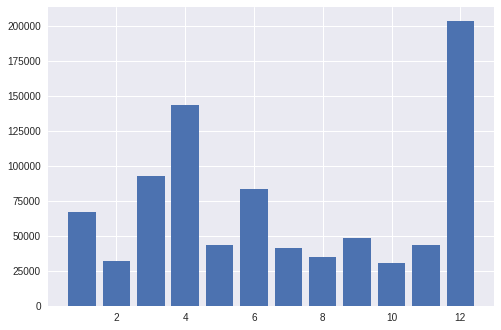

In [ ]:
#Graficar cantidad de pedidos por mes
plt.bar(df_AMZN_mes['Mes'],df_AMZN_mes['qty_ordered'])

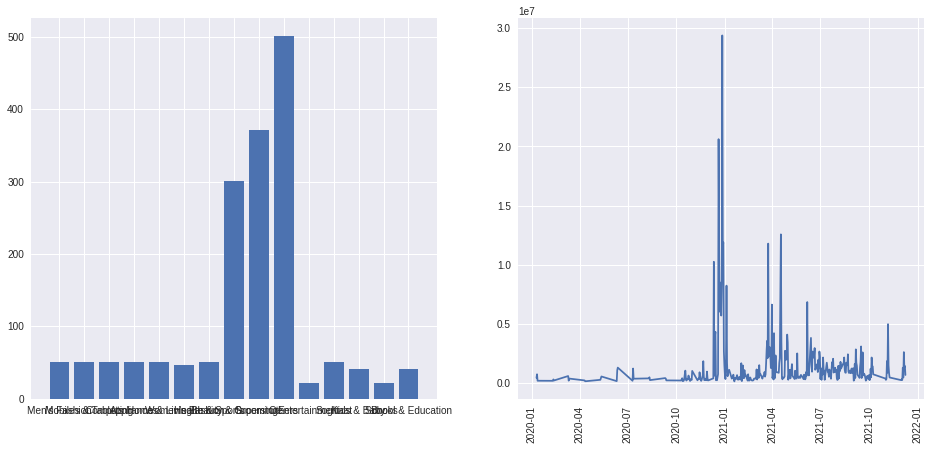

In [ ]:
# Hacer subplot de graficos. Izquierdo: Cantidad de pedidos según categorías // Derecho:Total de ventas en 2 años, por trimestres
fig, axes = plt.subplots(1,2, figsize = (16,7))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.bar(df_AMZN['category'], df_AMZN['qty_ordered'])
ax2.plot(df_AMZN_fecha['Total_Ventas'])
ax1,ax2 = plt.xticks(rotation=90)

plt.show()


In [ ]:
# Agrupar por fechas
df_AMZN_fecha = df_AMZN.groupby('order_date').sum()
df_AMZN_fecha.head()

,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent,Mes,Total_Ventas
order_date,,,,,,,,,,,,,
2020-01-10,1168,195216.711,221812.111,2140.00000,219672.11100,20999981,864560,212068218,19573,24355339,987.073666,428,417028.822
2020-01-11,1004,388250.300,323093.500,8985.52297,314107.97703,18490256,733260,200342647,17935,18688142,2569.872878,363,711343.800
2020-01-12,363,80348.700,81572.700,20.00000,81552.70000,9032959,349460,92628896,7248,8123672,75.249260,173,161921.400
2020-02-10,843,74844.970,81741.490,2810.00000,78931.49000,16716722,731240,214505160,16701,16244407,972.824019,724,156586.460
2020-02-11,438,130781.900,142256.400,1220.00000,141036.40000,9277466,367640,97628144,8018,12056990,104.748572,364,273038.300


In [ ]:
#Organizar fechas por semanas para obtener más detalles
df_AMZN_fecha = df_AMZN_fecha.resample('W').sum()

In [ ]:
df_AMZN_fecha.head(10)

,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent,Mes,Total_Ventas
order_date,,,,,,,,,,,,,,
2020-01-12,563389539,2535,663815.711,626478.311,11145.52297,615332.78803,48523196,1947280,505039761,44756,51167153,3632.195803,964,1290294.022
2020-01-19,0,0,0.000,0.000,0.00000,0.00000,0,0,0,0,0,0.000000,0,0.000
2020-01-26,0,0,0.000,0.000,0.00000,0.00000,0,0,0,0,0,0.000000,0,0.000
2020-02-02,0,0,0.000,0.000,0.00000,0.00000,0,0,0,0,0,0.000000,0,0.000
2020-02-09,0,0,0.000,0.000,0.00000,0.00000,0,0,0,0,0,0.000000,0,0.000
2020-02-16,453547909,1782,293381.545,317296.965,4440.00100,312856.96400,37350677,1561460,442307214,35705,41487012,1387.549690,1546,610678.510
2020-02-23,0,0,0.000,0.000,0.00000,0.00000,0,0,0,0,0,0.000000,0,0.000
2020-03-01,0,0,0.000,0.000,0.00000,0.00000,0,0,0,0,0,0.000000,0,0.000
2020-03-08,0,0,0.000,0.000,0.00000,0.00000,0,0,0,0,0,0.000000,0,0.000


#Agrupar por estados las ventas

In [ ]:
df_AMZN_state = df_AMZN.groupby('State').sum()

#Resetear el index para poder utilizar la variable estados en los gráficos

In [ ]:
df_AMZN_state = df_AMZN_state.reset_index()

In [ ]:
df_AMZN_state.head(10)

,State,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent,Mes,Total_Ventas
0,AK,8889,2.150210e+06,2.165456e+06,1.981329e+05,1.967323e+06,162926205,5069749,1357467933,126973,250147245,17137.203578,19024,4.315666e+06
1,AL,15753,4.187979e+06,4.168818e+06,3.663281e+05,3.802490e+06,362462438,10612417,2967450416,247838,189102685,30577.908506,38845,8.356797e+06
2,AR,13538,4.093113e+06,4.020160e+06,3.113768e+05,3.708783e+06,323526076,9828209,2662121699,228791,351511855,26856.989731,35779,8.113274e+06
3,AZ,10996,3.331366e+06,3.367133e+06,2.508751e+05,3.116258e+06,239096323,7500401,2100192579,182172,317605474,20922.613028,28727,6.698499e+06
4,CA,49832,1.520294e+07,1.530266e+07,1.426480e+06,1.387618e+07,1196664366,34612989,9342379743,776701,1600955339,111344.971622,127613,3.050559e+07
5,CO,14090,4.037885e+06,4.078789e+06,3.063538e+05,3.772435e+06,371381104,10176060,2626414292,219343,406435545,28065.779836,36928,8.116674e+06
6,CT,8913,2.211472e+06,2.092402e+06,1.992293e+05,1.893172e+06,207051356,6136576,1691253821,132405,19509976,21711.449909,22886,4.303874e+06
7,DC,5651,1.478855e+06,1.464539e+06,1.532547e+05,1.311284e+06,130229901,3768386,1008519885,87035,38434111,12268.595985,14662,2.943394e+06
8,DE,2202,5.512089e+05,5.591320e+05,7.762040e+04,4.815116e+05,45604142,1444720,386144427,32693,14210766,6467.094171,5562,1.110341e+06
9,FL,31641,9.157738e+06,9.271474e+06,8.124370e+05,8.459037e+06,727938309,21293304,6030113815,491995,350922118,64185.659495,78631,1.842921e+07


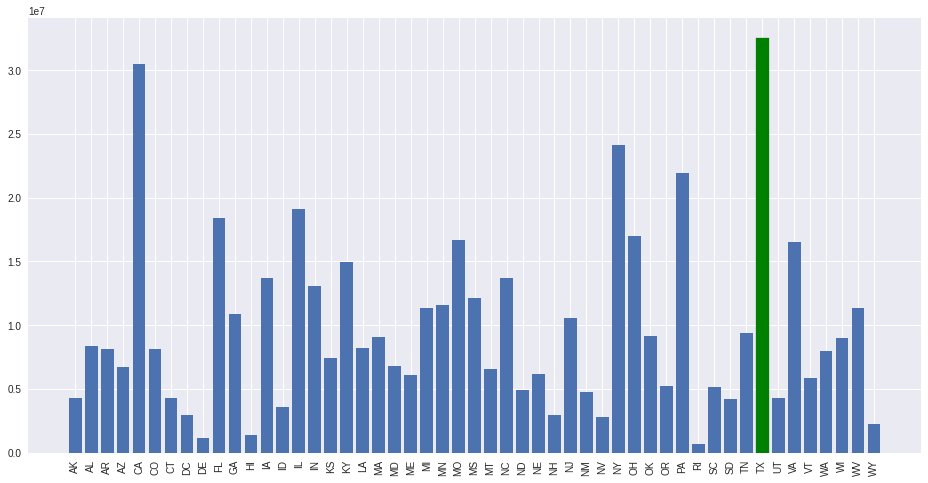

In [ ]:
#Graficar el total de ventas según los Estados
plt.figure(figsize=(16,8))
bars=plt.bar(df_AMZN_state['State'], df_AMZN_state['Total_Ventas'])
plt.xticks(rotation=90)
bars[43].set_color('g')
plt.show()

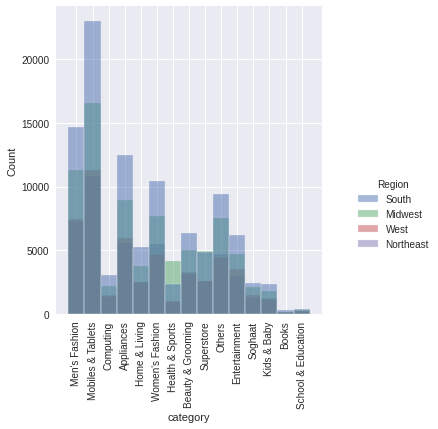

In [ ]:
#Graficar las ventas por categoría y por región 
sns.displot(data=df_AMZN, x='category', hue='Region')
plt.xticks(rotation=90)
plt.show()

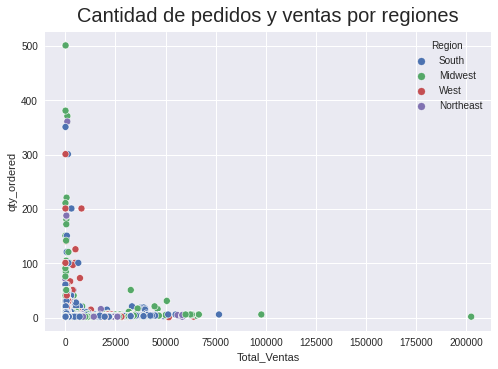

In [ ]:
#Graficar el total de ventas, relacionándolo con la cantidad de pedidos ordenados y las distintas regiones 
plt.title("Cantidad de pedidos y ventas por regiones", fontsize=20, verticalalignment='bottom');
sns.scatterplot(data=df_AMZN, x="Total_Ventas", y="qty_ordered", hue="Region")

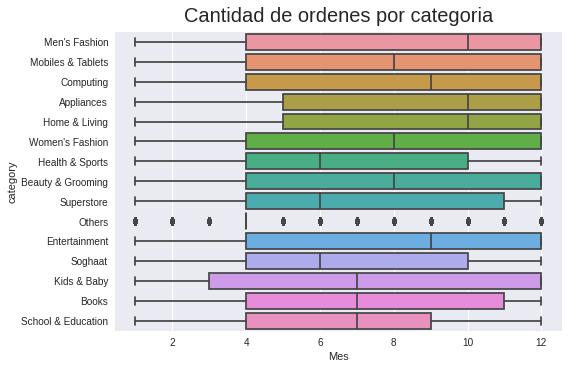

In [ ]:
#Graficar el total de ordenes según categorías a lo largo del año.
plt.title("Cantidad de ordenes por categoria", fontsize=20, verticalalignment='bottom');
sns.boxplot(x="Mes", y="category", data=df_AMZN)

# Resetear index en el df_AMZN_fecha para poder observar semanalmente las ventas


In [ ]:
df_AMZN_fecha = df_AMZN_fecha.reset_index()

In [ ]:
df_AMZN_fecha.head()

,order_date,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent,Mes,Total_Ventas
0,2020-01-10,1168,195216.711,221812.111,2140.00000,219672.11100,20999981,864560,212068218,19573,24355339,987.073666,428,417028.822
1,2020-01-11,1004,388250.300,323093.500,8985.52297,314107.97703,18490256,733260,200342647,17935,18688142,2569.872878,363,711343.800
2,2020-01-12,363,80348.700,81572.700,20.00000,81552.70000,9032959,349460,92628896,7248,8123672,75.249260,173,161921.400
3,2020-02-10,843,74844.970,81741.490,2810.00000,78931.49000,16716722,731240,214505160,16701,16244407,972.824019,724,156586.460
4,2020-02-11,438,130781.900,142256.400,1220.00000,141036.40000,9277466,367640,97628144,8018,12056990,104.748572,364,273038.300


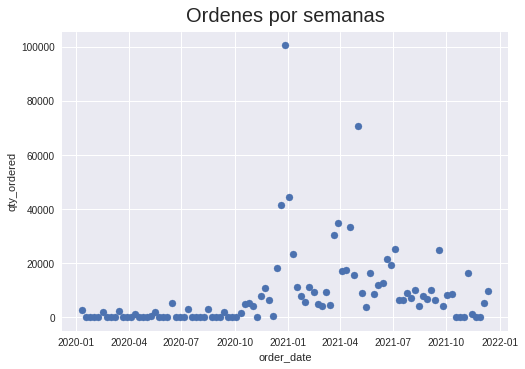

In [ ]:
# Graficar ordenes pedidas por semanas. Se puede observar la relación en el lapso del inicio de la pandemia con las pocas ordenes 
plt.scatter(df_AMZN_fecha['order_date'],df_AMZN_fecha['qty_ordered'])
plt.title("Ordenes por semanas", fontsize=20, verticalalignment='bottom');
plt.xlabel("order_date");
plt.ylabel("qty_ordered");

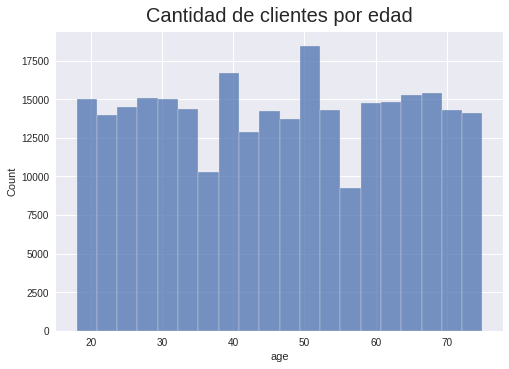

In [ ]:
# Graficar distribución de las edades de los clientes
plt.title("Cantidad de clientes por edad", fontsize=20, verticalalignment='bottom');
sns.histplot(data= df_AMZN, x= "age", bins=20)

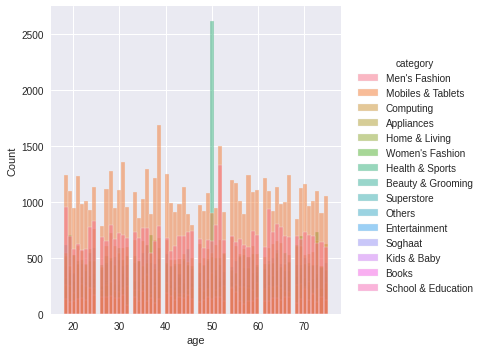

In [ ]:
#Graficar las ventas por categoría y por región 
sns.displot(data=df_AMZN, x='age', hue='category')
plt.show()

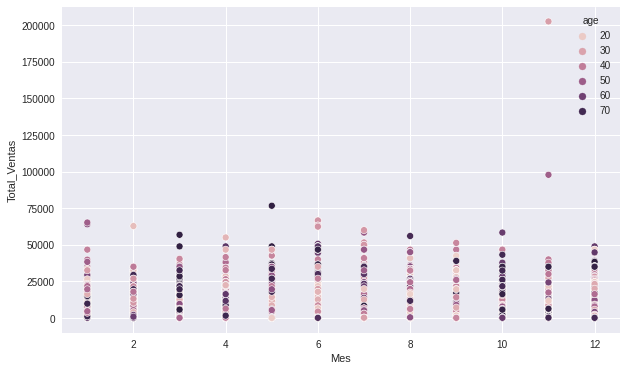

In [ ]:
# Graficar las ventas según las edades a lo largo de año
sns.set_style= ('whitegrid')
plt.figure(figsize=(10,6))
sns.scatterplot(x= df_AMZN.Mes, y= df_AMZN.Total_Ventas, hue= df_AMZN.age)

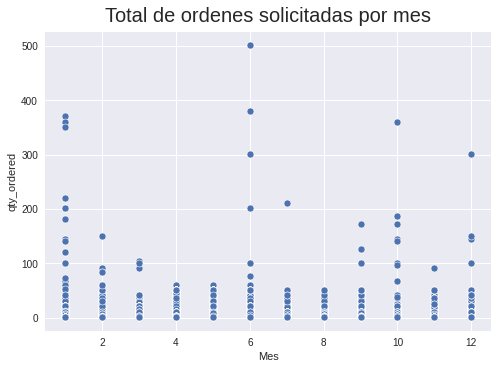

In [ ]:
# Graficar la cantidad de ordenes por mes
plt.title("Total de ordenes solicitadas por mes", fontsize=20, verticalalignment='bottom');
sns.scatterplot(x='Mes', y='qty_ordered',data= df_AMZN)
plt.show()


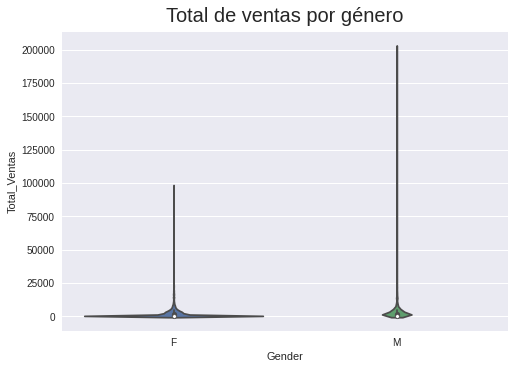

In [ ]:
# Graficar total de ventas según género
plt.title("Total de ventas por género", fontsize=20, verticalalignment='bottom');
sns.violinplot(x= df_AMZN.Gender, y=df_AMZN.Total_Ventas , data= df_AMZN)

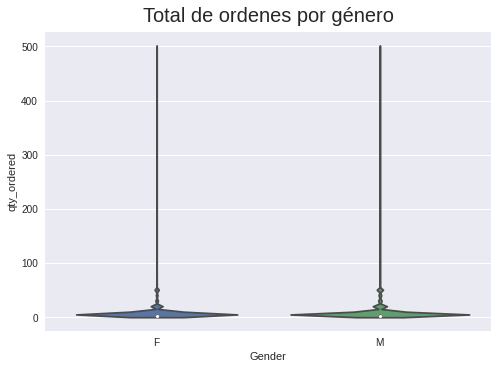

In [ ]:
# Graficar total de pedidos según género
plt.title("Total de ordenes por género", fontsize=20, verticalalignment='bottom');
sns.violinplot(x= df_AMZN.Gender, y=df_AMZN.qty_ordered , data= df_AMZN)



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


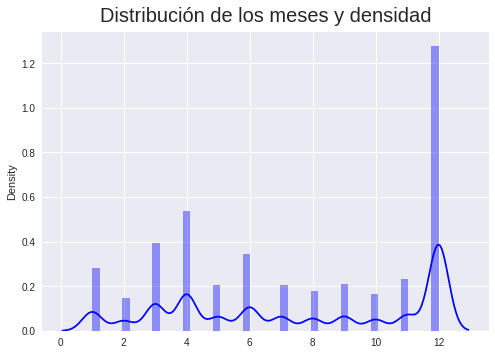

In [ ]:
# Graficar distribución en los meses junto con la densidad de los mismos
plt.title("Distribución de los meses y densidad", fontsize=20, verticalalignment='bottom');
sns.distplot(x= df_AMZN.Mes, color= 'blue')

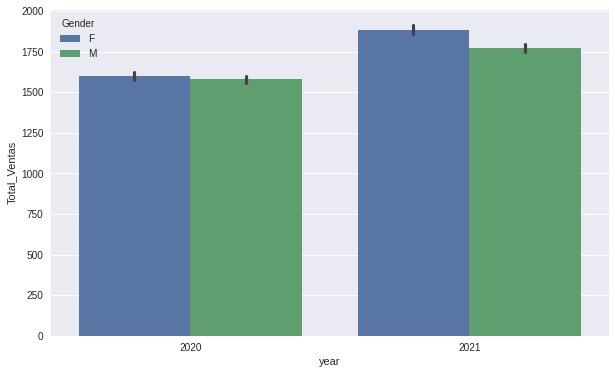

In [ ]:
# Graficar el total de ventas por género en cada año
plt.figure(figsize=(10,6))
sns.barplot(x= df_AMZN.year, y=df_AMZN.Total_Ventas , hue= df_AMZN.Gender, data= df_AMZN)


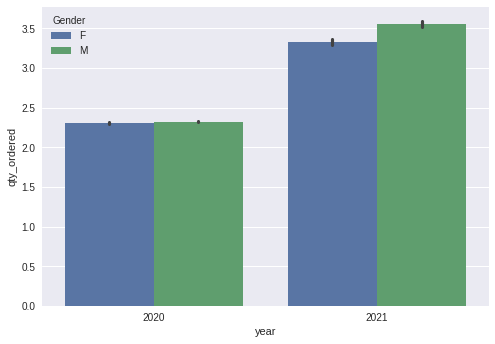

In [ ]:
# Graficar la cantidad de ordenes por género en cada año
sns.barplot(x='year', y = 'qty_ordered', hue = 'Gender', data = df_AMZN) 

#Potenciales hipótesis: luego de haber realizado gráficos de diversos tipos, relacionando unas variables con otras y, habiendo observado los mismos, se han formulado las siguientes hipótesis, que se encontrarán a continuación. Los objetivos por los cuales se buscará aceptar o rechazar dichas hipótesis, entre otros, serán:

*  Segmentar a los clientes según las edades y las categorías que consumen

*  Identificar qué meses son más fuertes en ventas y/o pedidos, y si se relacionan con fechas en particular (ej. Navidad)

*  Lograr subir las ventas ($) en las mujeres, ya que realizan los mismos o más pedidos que los hombres, pero gastan menos dinero

*  Identificar si las ventas por estados se relacionan con la población y la situación económica de los mismos

*  Determinar si existen más productos/categorías para grupos etarios mayores, ya que predominan entre el total de clientes

*  Cuantificar de qué manera "golpeó" a nivel ventas el inicio de la pandemia en 2020, con respecto a 2021




# HIPÓTESIS PRELIMINARES


* Texas y luego California son los estados con más ventas. Tiene esto relación con el tamaño de la población de estos? O influyen otros factores como los económicos y sociales?

* La categoría Health & Sports es la que menos pedidos tiene en el año, concentrando la mayor cantidad en el segundo trimestre del mismo. Es esta una tendencia en ascenso?

* La distribución de las ordenes durante el año arroja que en el mes 6 es cuando más se compra, lo que no significa que sea el mes que mayor beneficios genera. Comprobar dicha relación

* Los grupos etarios de mayor edad están muy presentes en la cantidad de clientes, siendo el grupor de 50, el que cuenta con mayor cantidad. Se debe esto a la mejor posición económica y una edad a la que se consume más? O puede tener que ver con las categorías disponibles para ellos?

* A la hora de hablar de ventas por categorías, los electrónicos y la tecnología en general son los grandes ganadores. 

* El grupo etario más presente, el de 50 años, consume mayormente categorías sobre deportes y salud.

* Los grupos etarios de mayor edad (60-70), lideran las compras en los meses 3 y 10. Cuál es la razón?

* Los hombres generan el doble en ventas que las mujeres. Sin embargo, la cantidad de pedidos que realizan son los mismos. Es decir, las compras que realizan los hombres son más costosas. Tiene que ver con alguna categoría en especial que sea más costosa? Otra opción podría ser que la mujer consuma muchos productos pero de bajo valor.

* Las ventas en 2020 con respecto a los géneros fueron prácticamente iguales, levemente superior en las mujeres. Por otro lado, el 2021 subieron las ventas en general, y además las mujeres agrandaron esa brecha. Sin embargo, de manera inversamente proporcional, al hablar de cantidad de ordenes realizadas, en el 2020 estas estuvieron ligeramente lideradas por los hombres, y en el 2021 se distanció esa brecha, ya que fueron por los que realizaron más ordenes. Esto se contradice con la hipótesis anterior. Cuál de los gráficos es el correcto? A qué se debe esta diferencia en los gráficos?

* Diciembre es un mes con muchas ventas, tiene esto estrecha relación con las fechas festivas como navidad o el fin del año?

* Al arranque de 2021 se nota una gran suba en la cantidad de pedidos, se debe esto a la puesta en marcha del comercio electrónico luego del golpe de la pandemia?

#CUARTA ENTREGA PROYECTO FINAL DS 2023

OBJETIVO: Segmentación de clientes de Amazon, teniendo en cuenta las edades, las categorías que consumen y los meses en el año que más compran, entre otras variables

CONTEXTO COMERCIAL: Amazon tiene como lema que es la tienda más centrada en el cliente del mundo. Esta es una de las 500 mayores empresas de EE.UU. 
La compañía, con sede en Seattle (Washington) es un líder global en el comercio electrónico y también en los servicios de computación en la nube. 
Opera en más de 180 países y tiene más de 300 millones de cuentas de clientes activas y casi 2 millones de socios comerciales en el mundo entero.
Es por ello que resulta clave poder realizar una segmentación de clientes, para poder optimizar los procesos y toma de decisiones, y aplicarlos a las recomendaciones, ofertas, descuentos, y de esa manera lograr aumentar las ventas.

PROBLEMA COMERCIAL: 

* Qué género realiza más compras? Esto se traduce a mayores ventas? Qué días compran más?

* Cómo es la distribución de clientes por edades en cuanto a pedidos realizados? Y en cuanto a ventas?

* Comparar las ventas de 2020 y 2021 teniendo en cuenta las categorías. Cuáles aumentaron más? Ha mejorado su performance la categoría Health & Sports? Ya que esta era la que menos ordenes recibía.

* Cuáles son los meses en los que más se compra? Y los que mayores ganancias arrojan?

* El grupo de 50 años es el predominante en cuanto a número de clientes. Es el que mayores ventas genera?

* Los domingos son los días que más compras se realizan. Cuál/es son las razones? Puede segmentarse esto por edades o géneros? Es el día que mayores ventas genera?

* Existe una correlación entre la cantidad de ordenes y el total de ventas en cada año?


CONTEXTO ANALÍTICO: El Dataset trabajado contiene información sobre las ventas del e-comerce Amazon, durante los años 2020-2021. Contiene además variables como fecha de orden, cantidad de ordenes, id del cliente, id del item, estados, ciudades, categorías, géneros, entre otros. Todas estas variables
han sido útiles para inferir en los problemas comerciales planteados.


EDA: Se han obtenido diversos insights por medio de las visualizaciones. Estos se encuentran acompañando dichas visualizaciones.






In [ ]:
df_AMZN.describe()

,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent,Mes,Total_Ventas
count,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000
mean,3.011296,851.385253,885.879934,70.039427,815.840507,70048.019054,2020.618778,560853.663395,46.489033,49723.160015,6.069079,7.490464,1737.265187
std,4.573837,1741.750751,2073.252179,256.880870,1983.580302,30243.856395,0.485688,255828.418398,16.673288,27597.198873,10.100100,3.886899,3587.798470
min,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2020.000000,111127.000000,18.000000,210.000000,0.000000,1.000000,0.000000
25%,2.000000,49.900000,49.900000,0.000000,49.900000,56519.000000,2020.000000,341265.000000,32.000000,26571.750000,0.000000,4.000000,123.600000
50%,2.000000,119.000000,158.970000,0.000000,149.800000,74225.500000,2021.000000,564857.000000,47.000000,49316.000000,0.000000,7.000000,330.000000
75%,3.000000,950.000000,910.000000,18.383050,800.000000,92357.000000,2021.000000,781086.000000,61.000000,72645.000000,11.000000,12.000000,1999.800000
max,501.000000,101262.590000,101262.590000,30213.150000,101262.590000,115326.000000,2021.000000,999981.000000,75.000000,99950.000000,75.000000,12.000000,202525.180000


In [ ]:
df_AMZN['order_date'] = pd.to_datetime(df_AMZN['order_date'])


<AxesSubplot:xlabel='WEEKDAY'>

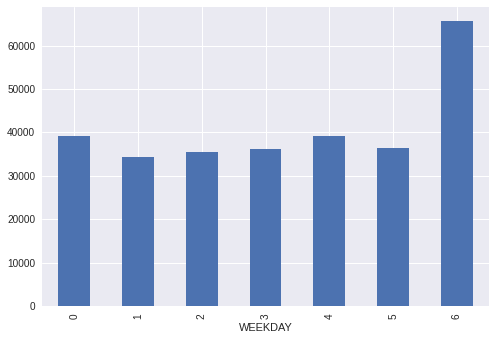

In [ ]:
df_AMZN['WEEKDAY'] = df_AMZN['order_date'].dt.weekday
weekday_ventas = df_AMZN.groupby('WEEKDAY').size()
weekday_ventas.plot.bar()

Aquí podemos observar que el día de la semana que más pedidos se realizan es el domingo. Posiblemente tenga que ver con que es un día de descanso para las personas, y pueden ocupar el tiempo de ocio buscando productos que satisfagan sus necesidades

In [ ]:
df_AMZN.groupby('State').size()

State
AK     2509
AL     5252
AR     4864
AZ     3712
CA    17130
CO     5036
CT     3037
DC     1865
DE      715
FL    10538
GA     6346
HI      800
IA     8170
ID     2348
IL    12628
IN     6738
KS     4879
KY     7397
LA     4709
MA     5001
MD     4163
ME     2857
MI     7137
MN     8020
MO     8876
MS     3565
MT     3122
NC     7549
ND     2350
NE     3775
NH     1695
NJ     4984
NM     2987
NV     1725
NY    15567
OH    10204
OK     5253
OR     3179
PA    14394
RI      492
SC     3771
SD     2993
TN     4981
TX    17510
UT     2650
VA     8557
VT     2504
WA     4155
WI     5529
WV     6447
WY     1727
dtype: int64

In [ ]:
df_AMZN.groupby(['Gender', 'Mes']).size()

Gender  Mes
F       1       9261
        2       5022
        3      13421
        4      18032
        5       6636
        6      11544
        7       7206
        8       6091
        9       6817
        10      5686
        11      7820
        12     42672
M       1       9883
        2       4991
        3      13590
        4      18883
        5       7339
        6      12202
        7       6967
        8       6247
        9       7652
        10      5632
        11      7981
        12     44817
dtype: int64

Como puede observarse, el mes 6 y 12 son los meses donde más se compra. Esto parecería tener relación con las vacaciones de los consumidores. Tanto hombres como mujeres realizan prácticamente la misma cantidad de ordenes mes a mes. Sin embargo, el hombre la supera levemente en la mayoría del año.

In [ ]:
def normalize(df_AMZN):
  result = df_AMZN.copy()

  for feature_name in df_AMZN,columns:
    max_val = df_AMZN[feature_name].max()
    min_val = df_AMZN[feature_name].min()
    result[feature_name] = (df_AMZN[feature_name] - min_val) / (max_val - min_val)

  return result

df_AMZN.head(5)

,order_id,order_date,status,sku,qty_ordered,price,value,discount_amount,total,category,...,County,City,State,Zip,Region,User Name,Discount_Percent,Mes,Total_Ventas,WEEKDAY
item_id,,,,,,,,,,,,,,,,,,,,,
574772,100354678,2020-01-10,received,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,Men's Fashion,...,Harmon,Vinson,OK,73571,South,jwtitus,0.0,1,1887.9,4
574774,100354678,2020-01-10,received,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,Men's Fashion,...,Harmon,Vinson,OK,73571,South,jwtitus,0.0,1,209.0,4
574777,100354680,2020-01-10,complete,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,Men's Fashion,...,Harmon,Vinson,OK,73571,South,jwtitus,0.0,1,1349.1,4
574779,100354680,2020-01-10,complete,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,Men's Fashion,...,Harmon,Vinson,OK,73571,South,jwtitus,0.0,1,719.1,4
595185,100367357,2020-11-13,received,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,Men's Fashion,...,Harmon,Vinson,OK,73571,South,jwtitus,0.0,11,199.8,4


In [ ]:
df_group_50 = df_AMZN[df_AMZN['age'] == '50']


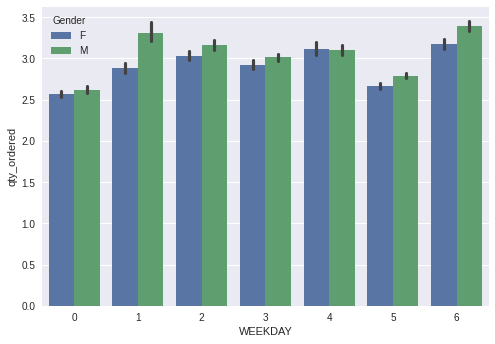

In [ ]:
sns.barplot(x='WEEKDAY', y = 'qty_ordered', hue = 'Gender', data = df_AMZN)

Según indica el gráfico, los hombres realizan más compras los días martes y domingos, mientras que las mujeres lo hacen los días jueves y domingos. Sabíamos por el gráfico anterior, que el domingo es el día más elegido para realizar compras.

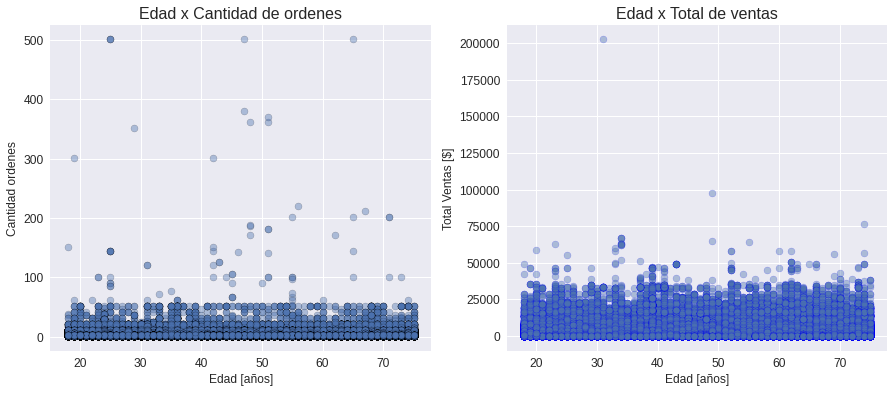

In [ ]:
# Edad vs. Cantidad de ordenes
plt.figure(figsize=(15,6))
plt.subplot(121)
# Hacemos un scatter plot
plt.scatter(df_AMZN['age'], df_AMZN['qty_ordered'], edgecolor='k', alpha=0.4)
plt.yticks(fontsize=12)
plt.ylabel('Cantidad ordenes', fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Edad [años]', fontsize=12)
plt.title('Edad x Cantidad de ordenes', fontsize=16)

# Edad vs Total de ventas
plt.subplot(122)
plt.scatter(df_AMZN['age'], df_AMZN['Total_Ventas'], edgecolor='b', alpha=0.4)
plt.xlabel('Edad [años]', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Total Ventas [$]', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Edad x Total de ventas', fontsize=16)
plt.show()

Podemos ver en las dos dispersiones que no significan lo mismo la cantidad de ordenes pedidas que las compras (ventas) realizadas. Partiendo desde lo general, se puede ver que la gran mayoría de clientes realiza hasta 50 pedidos. Luego, La distribución de las ordenes por edades muestra un cierto grupo consolidado entre los 40 y los 70 años, que ordenan hasta 200 pedidos. Al referirnos a un mayor número de pedidos, entre 300 y 400, encontramos al grupo entre 45 y 50 años. Como ya sabíamos, el grupo de 50 años es el más predominante a hablar de edades. 
Centrandonos en los grupos que realizan hasta 500 pedidos, que es el máximo según habíamos averiguado (describe), encontramos como "outliers" a los clientes de 25, 47 y 65 años. Esto quiere decir que las categorías cubren casi todo el espectro de edades de los clientes, abarcando así 40 años de diferencia entre el grupo más joven y el más adulto.

En cambio, al observar el grafico de total de ventas según las edades, podemos diferenciar a un grupo homogeneo hasta los $30.000. Igualmente, luego de ese monto y hasta los 60.000 dólares, los grupos describen una distribución pareja, a no ser por el grupo entre los 40 y 50 años, que casi no generan ventas superiores a 30.000 dólares. 
Como outliers podemos marcar al grupo de 31 años, con ventas de 200.000 dólares; al grupo de 49 años, con ventas de 100.000 dólares; y por último al grupo de 75 años con ventas de 75.000 dólares.

Podemos concluir en que el grupo más numeroso, el de 50 años, realiza gran cantidad de ordenes, pero no genera grandes ventas. Es decir, realiza compras de bajo valor. Por otro lado, a grandes rasgos podríamos inferir en que la mayoría de los grupos por edades de los clientes, realizan desd muy pocas y hasta 50 ordenes, lo que representa un valor entre 0 y 30.000 dólares.

In [ ]:
df_AMZN.groupby(['year', 'category']).size()


year  category          
2020  Appliances            15490
      Beauty & Grooming      6656
      Books                   286
      Computing              3460
      Entertainment          7376
      Health & Sports        1651
      Home & Living          6830
      Kids & Baby            2425
      Men's Fashion         20067
      Mobiles & Tablets     25166
      Others                 1993
      School & Education      260
      Soghaat                2266
      Superstore             4299
      Women's Fashion       10954
2021  Appliances            17544
      Beauty & Grooming     11243
      Books                   528
      Computing              4650
      Entertainment          9976
      Health & Sports        6770
      Home & Living          7160
      Kids & Baby            4067
      Men's Fashion         20646
      Mobiles & Tablets     36595
      Others                24115
      School & Education      830
      Soghaat                4984
      Superstore       

Podemos ver como desde 2020 a 2021 hay categorias que han crecido sus ventas de manera exponencial. Una de las categorías que nos interesaba en las hipótesis era Health & Sports, ya que era la categoría con menos pedidos. Sin embargo, es notable como aumentaron las ventas en dicha categoría de un año al otro, pasando de 1651 pedidos a 6770, lo que arroja un aumento mayor al 400%. Esto puede deberse a que en el año 2020 el mundo se "congeló" por el inicio de la pandemia, y al haber transcurrido todo un año sin poder ni siquiera salir de los hogares, esto puede haber causado un gran deseo o necesidad de ejercicio, probablemente en casa.

En cuanto a las categorías de mayor peso en cuanto a pedidos, estamos hablando de Appliances, Men's & Women's Fashion, Mobiles & Tablets, diremos que han aumentado de 2020 a 2021. Sobre todo Women's Fashion (160%), Appliances (113%), Mobiles & Tablets (145%). Men's Fashion prácticamente no ha sufrido variación. Por lo tanto, podemos inferir en que hubo un gran aumento en el consumo de electrónicos, probablemente por la situación de encierro por la pandemia. Pero por otro lado, es notorio como al empezar a salir de los hogares a la rutina habitual, las mujeres realizaron grandes compras en productos de belleza, quedando en evidencia la importancia de esta categoría para este género.

In [ ]:
df_AMZN.groupby(['category']).size()



category
Appliances            33034
Beauty & Grooming     17899
Books                   814
Computing              8110
Entertainment         17352
Health & Sports        8421
Home & Living         13990
Kids & Baby            6492
Men's Fashion         40713
Mobiles & Tablets     61761
Others                26108
School & Education     1090
Soghaat                7250
Superstore            15024
Women's Fashion       28334
dtype: int64

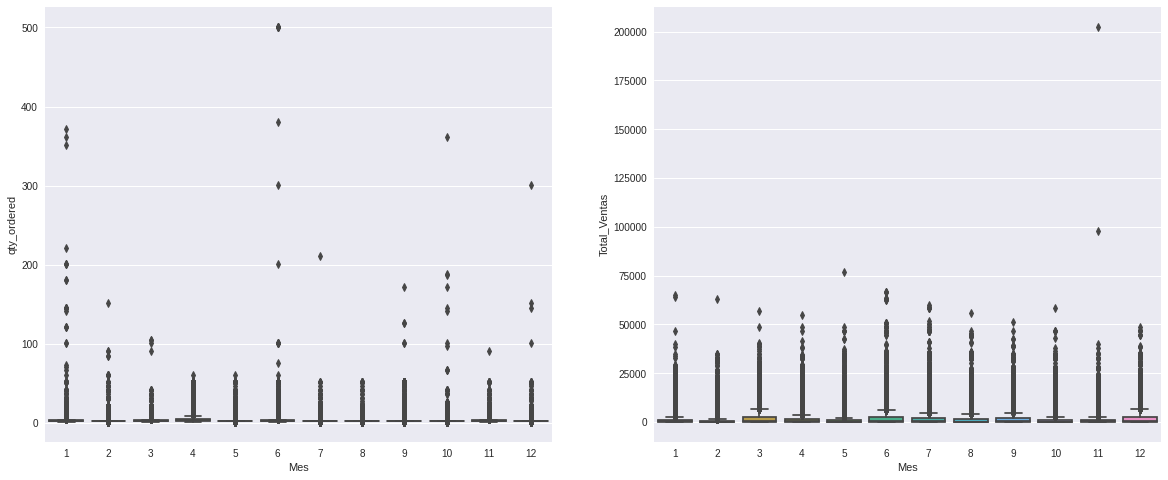

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.boxplot(x='Mes', y = 'qty_ordered', data = df_AMZN)
plt.subplot(122)
sns.boxplot(x='Mes', y = 'Total_Ventas', data = df_AMZN)

Comparando los dos graficos por meses, podemos identificar que en cuanto a cantidad de pedidos, el mes 6 es el gran ganador. Ya contábamos con la información de que el mes 6 y 12 eran los que más vendían. Sin embargo, en cuanto a pedidos el mes 12 no se encuentra cercano al mes 6, el que si se ubica luego del mes 6 es el mes 1, con lo cual nos llevamos una sorpresa.

En el gráfico derecho analizamos las ventas, y allí vemos que se equilibran todos los meses, muy distinto al gráfico izquierdo de los pedidos. Hasta podemos notar que el mes 11 tiene ventas récord en comparación a los demás (outliers a analizar).

Podemos concluir con que el mes 6 es el que más relación lleva en cuanto a cantidad de ordenes y total de ventas

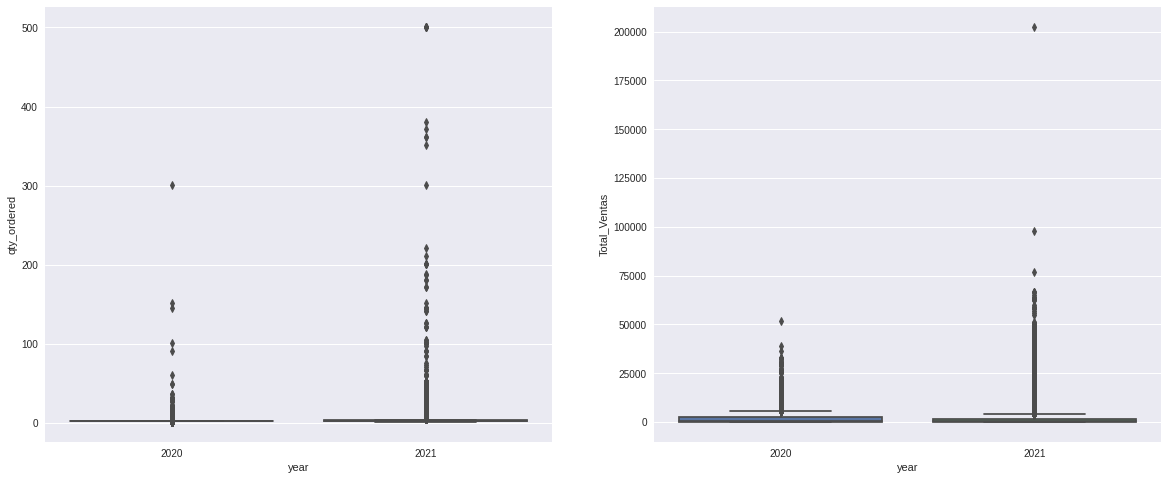

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.boxplot(x='year', y = 'qty_ordered', data = df_AMZN)
plt.subplot(122)
sns.boxplot(x='year', y = 'Total_Ventas', data = df_AMZN)

Al analizar del mismo modo que el anterior, pero esta vez tomando los años en vez de los meses, aquí encontramos una correlación entre cantidad de ordenes y total de ventas, siendo ampliamente superior el 2021, en el que se comenzó a reactivar la economía durante la pandemia.

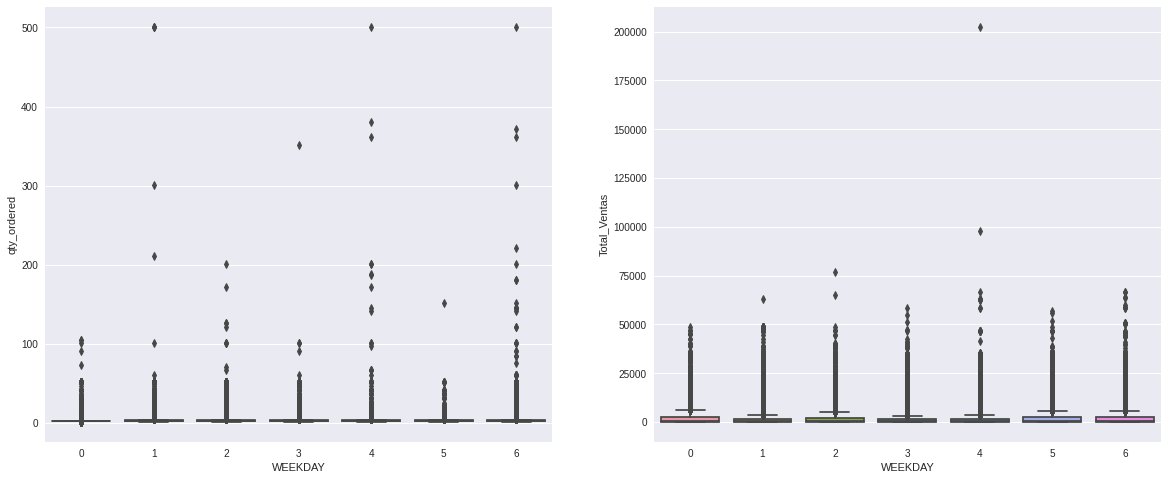

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.boxplot(x='WEEKDAY', y = 'qty_ordered', data = df_AMZN)
plt.subplot(122)
sns.boxplot(x='WEEKDAY', y = 'Total_Ventas', data = df_AMZN)

Por último, haremos el análisis según los días de la semana. Sabíamos por análisis anteriores que el día domingo era el más elegido para realizar compras. Sin embargo, podemos observar que no necesariamente es el que mayores beneficios genera. Ya que tomando el grafico de ventas, los días de la semana presentan una distribución pareja. Incluso, el día viernes podría ser el que mayor rentabilidad genera.

# Una opción para la segmentación de clientes planteada, podría ser el uso del algoritmo no supervisado K-Means, ya que es un método de agrupamiento que divide un conjunto de n observaciones en k grupos distintos gracias a valores medios.

El algoritmo cuenta con tres pasos:

Inicialización: una vez escogido k (número de grupos), se establecen los centroides en el espacio de los datos, por ejemplo asignando los k puntos aleatoriamente.

Asignación de las observaciones a los centroides: cada observación es asignada al centroide más cercano a ella usando la medida de distancia que se determine.

Actualización de los centroides: se actualiza la posición de los centroides de cada grupo tomando como posición la media de la localización de las observaciones de dicho grupo.
Se repiten los pasos 2 y 3 hasta que los centroides se quedan fijos, o se mueven por debajo de una distancia umbral fijada.

El algoritmo k-means es un algoritmo de optimización cuyo objetivo es minimizar la suma de distancias cuadráticas de cada observación al centroide de su clúster.

# QUINTA ENTREGA PROYECTO FINAL DATA SCIENCE 2023

Como se mencionó al principio, el objetivo de la aplicación del algoritmo, será la segmentación de los clientes. Para ello se han aplicado dos algoritmos de tipo no supervisado, con el fin de detectar a priori cual de ellos será más óptimo. Uno de ellos fue el de Regresión Logística, y el otro el algoritmo KNN. Además, se aplicó el algoritmo no supervisado K-means, ya que es un algoritmo de agrupamiento, con el fin de obtener el número óptimo de clusters e identificar bien las segmentaciones de clientes planteadas en el objetivo del proyecto.



In [ ]:
df_AMZN = df_AMZN.reset_index()

In [ ]:
df_AMZN.index = df_AMZN['item_id']
df_AMZN = df_AMZN.drop ('item_id', axis = 'columns')

In [ ]:
def normalize(df_AMZN):
  result = df_AMZN.copy()

  for feature_name in df_AMZN,columns:
    max_val = df_AMZN[feature_name].max()
    min_val = df_AMZN[feature_name].min()
    result[feature_name] = (df_AMZN[feature_name] - min_val) / (max_val - min_val)

  return result
 

In [ ]:
df_AMZN.head(5)

,item_id,order_id,order_date,status,sku,qty_ordered,price,value,discount_amount,total,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,574772,100354678,2020-01-10,received,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,...,0,0,0,0,0,0,0,0,0,0
1,574774,100354678,2020-01-10,received,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,...,0,0,0,0,0,0,0,0,0,0
2,574777,100354680,2020-01-10,complete,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,...,0,0,0,0,0,0,0,0,0,0
3,574779,100354680,2020-01-10,complete,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,...,0,0,0,0,0,0,0,0,0,0
4,595185,100367357,2020-11-13,received,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
category_dummy = pd.get_dummies(df_AMZN['category'], prefix = 'Category')
df_AMZN = pd.concat([df_AMZN, category_dummy], axis = 1)


In [ ]:
from sklearn.preprocessing import LabelEncoder


labelenc = LabelEncoder()

df_AMZN['category'] = labelenc.fit_transform(df_AMZN['category'])

df_AMZN.head()

NameError: ignored

In [ ]:
X = df_AMZN[[ 'age', 'qty_ordered', 'price', 'Mes', 'Zip', 'total', 'category']]

y = df_AMZN.Gender

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

X_train

,age,qty_ordered,price,Mes,Zip,total,category
172663,54,2,623.7,12,27614,623.700,0
282511,21,2,3300.0,6,95324,3300.000,9
129941,62,2,1400.0,12,63036,1197.000,9
98038,70,2,531.0,12,93513,477.900,4
184308,68,2,345.0,3,55076,345.000,1
...,...,...,...,...,...,...,...
21440,70,1,7909.9,5,16412,0.000,9
117583,65,2,1299.9,12,55929,1097.910,0
73349,41,2,1632.8,6,10261,1463.098,9
267336,59,2,19.4,1,95835,19.400,1


In [ ]:
X_test

,age,qty_ordered,price,Mes,Zip,total,category
86222,34,2,2739.6,12,96096,2369.6,4
116591,19,2,999.9,5,10026,899.9,9
270867,63,2,79.6,11,18512,79.6,8
236638,64,6,50.0,4,45845,250.0,10
173199,41,2,64.8,12,14508,64.8,8
...,...,...,...,...,...,...,...
236332,18,4,200.0,4,93527,600.0,10
100737,27,2,1835.0,12,5086,1835.0,4
124629,43,2,129.9,12,81101,129.9,9
71024,42,2,67.5,11,17759,57.5,6


# REGRESION LOGISTICA

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logr = LogisticRegression()

logr.fit(X_train,y_train)

y_pred = logr.predict(X_test)

print('accuracy', accuracy_score(y_test, y_pred))
print('confusion_matrix', confusion_matrix(y_test, y_pred))
print('classification_report', classification_report(y_test, y_pred))


accuracy 0.5117058607866758
confusion_matrix [[ 3337 24853]
 [ 3116 25973]]
classification_report               precision    recall  f1-score   support

           F       0.52      0.12      0.19     28190
           M       0.51      0.89      0.65     29089

    accuracy                           0.51     57279
   macro avg       0.51      0.51      0.42     57279
weighted avg       0.51      0.51      0.42     57279



# KNN (K - NEIGHBORS)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print('accuracy', accuracy_score(y_test, y_pred))
print('confusion_matrix', confusion_matrix(y_test, y_pred))
print('classification_report', classification_report(y_test, y_pred))

accuracy 0.8143298591106688
confusion_matrix [[22814  5376]
 [ 5259 23830]]
classification_report               precision    recall  f1-score   support

           F       0.81      0.81      0.81     28190
           M       0.82      0.82      0.82     29089

    accuracy                           0.81     57279
   macro avg       0.81      0.81      0.81     57279
weighted avg       0.81      0.81      0.81     57279



Lo que se buscó con la aplicación de los algoritmos fue poder predecir el género del cliente en cuestión, teniendo en cuenta las siguientes variables:
'age', 'qty_ordered', 'price', 'Mes', 'Zip', 'total'

* Total (Value - Discount_Amount)
* Edad 
* Mes 
* Cantidad de pedidos  
* Precio
* Zip (Código Postal)



Luego de observar las métricas que ambos arrojaron, es evidente que el algoritmo KNN es el que mejor se comporta con esta base de datos. Esta conclusión resulta de observar sobre todo el accuracy, que es la métrica más importante dentro de los algoritmos no supervisados. En el primer algoritmo (Regresión Logística), se obtuvo 0.51, lo cual es muy bajo. 
Luego, en el algoritmo KNN se obtuvo 0.73 de accuracy. Este valor también es bajo, aunque mucho mejor que el valor de la Regresión Logística. 
Sin embargo, probando con distintos valores de neighbors, se pudo observar que al disminuir el valor de estos, el accuracy comenzó a aumentar. De manera análoga, al aumentar el valor de los mismos, el accuracy disminuía.
Inicialmente se probó con 5 neighbors.
Luego con 4, 3, 2, y hasta 1. El mejor resultado del accuracy fue para el valor n_neighbors = 1, que arrojó un Accuracy de 0.81, lo cual es bastante bueno, e indica que hay posibilidad de que el accuracy pueda mejorarse bastante con otras modificaciones a lo largo del proyecto. Como así también, posiblemente pueda mejorarse el rendimiento del primer algoritmo aplicado.



# KMEANS

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

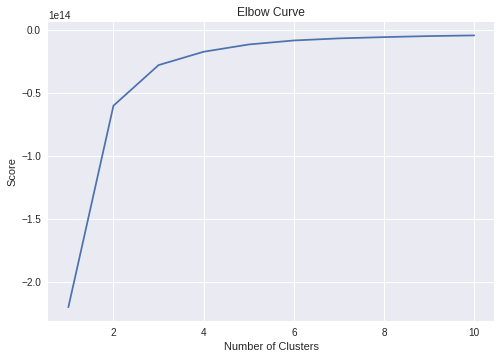

In [ ]:
X = np.array(df_AMZN[['age', 'qty_ordered', 'price', 'Mes', 'Zip', 'total', 'category']])
y = np.array(df_AMZN['Gender'])

# rango de cluster que deseo probar
Nc = range(1, 11)

kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


Según el gráfico, el número óptimo de cluster podría ser 3. A continuación desarrollaremos el algoritmo con dicho número de clusters. Esta vez tendremos en cuenta las variables "Mes" y Cantidad de ordenes", para concluir en si existe o no una correlación entre ambas a a hora de segmentar en clusters.

In [ ]:
X4=df_AMZN.loc[:,['age','qty_ordered']].values

In [ ]:
kmeans = KMeans(n_clusters=3)

label = kmeans.fit_predict(X4)
print(label)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 2 ... 2 2 1]


In [ ]:
print(kmeans.cluster_centers_)

[[65.97238056  3.03119017]
 [27.50888532  3.05031959]
 [47.04928438  2.9515668 ]]


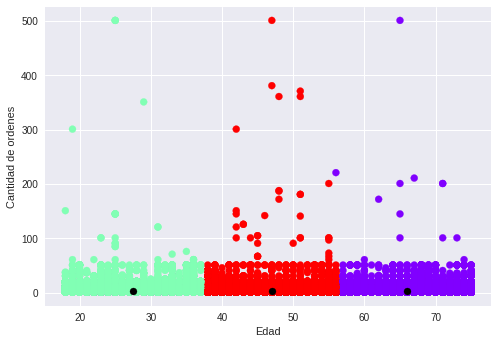

In [ ]:
plt.scatter(X4[:,0], X4[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.xlabel('Edad')
plt.ylabel('Cantidad de ordenes')
plt.show()

Como podemos observar, los centroides "puntos negros", se encuentran perfectamente separados, situados en las edades cercanas a los 30, a los 50 y a los 70. Gracias a la gráfica, es posible inferir cómo se comporta cada grupo (cluster) con respecto a los pedidos realizados (compras). El grupo entre 37 y 56 años es el que regularmente más pedidos realiza. Podemos diferenciar un subgrupo dentro de este, con edades entre los 47 y los 53, como el grupo que mayor cantidad de ordenes realiza.
Por otro lado, observando los dos grupos restantes, es llamativo como el sub grupo entre los 56 y los 62 no realiza más de 50 ordenes, lo cual es un número bajo, y un grupo al cual podría "apuntarse" para generar mayores ventas. 
Mirando el primer grupo (el más joven), puede inferirse algo similar que con el anterior mencionado, esta vez entre los clientes de 33 a 37 años. Estos no realizan más de 60-80 órdenes.
Al parecer el grupo del medio es el más sólido a nivel económico-financiero. Esto tiene sentido, ya que a esas edades uno podría llegar a la plenitud a nivel calidad y cantidad de empleo, y deja de tener ciertos gastos, como por ejemplo la manutención de sus hijos.
Centrándonos en dicho grupo como el más fuerte a nivel compras, podría realizarse un estudio más profundo para poder comenzar a lograr entre 200 y 300 pedidos, ya que es una brecha casi nula (aunque en todos los grupos etarios)

#DATA WRANGLING II

En esta etapa del trabajo nos enfocaremos en encontrar valores duplicados y/o nulos, así como también en agrupar distintas variables (categóricas) para luego realizar ciertas operaciones como mean, sum, count, y así obtener insights o ciertos datos que nos servirán cada vez más para el desarrollo final del algoritmo. También se intentará aplicar las funciones PIVOT y MELT para realizar distintas observaciones del Dataframe. 

In [ ]:
df_AMZN.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,Sign in date,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,01/10/2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,01/10/2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,01/10/2020,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,01/10/2020,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,13/11/2020,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,...,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [ ]:
df_AMZN.describe()

,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent
count,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000
mean,741664.902131,3.011296,851.385253,885.879934,70.039427,815.840507,70048.019054,2020.618778,560853.663395,46.489033,49723.160015,6.069079
std,95746.031827,4.573837,1741.750751,2073.252179,256.880870,1983.580302,30243.856395,0.485688,255828.418398,16.673288,27597.198873,10.100100
min,574769.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2020.000000,111127.000000,18.000000,210.000000,0.000000
25%,659684.500000,2.000000,49.900000,49.900000,0.000000,49.900000,56519.000000,2020.000000,341265.000000,32.000000,26571.750000,0.000000
50%,742309.000000,2.000000,119.000000,158.970000,0.000000,149.800000,74225.500000,2021.000000,564857.000000,47.000000,49316.000000,0.000000
75%,826124.250000,3.000000,950.000000,910.000000,18.383050,800.000000,92357.000000,2021.000000,781086.000000,61.000000,72645.000000,11.000000
max,905208.000000,501.000000,101262.590000,101262.590000,30213.150000,101262.590000,115326.000000,2021.000000,999981.000000,75.000000,99950.000000,75.000000


CONOCER CUÁNTAS CATEGORÍAS HAY EN TOTAL

In [ ]:
df_AMZN['category'].describe()

count                286392
unique                   15
top       Mobiles & Tablets
freq                  61761
Name: category, dtype: object

CONOCER SI EXISTEN DUPLICADOS

In [ ]:
df_AMZN.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
286387    False
286388    False
286389    False
286390    False
286391    False
Length: 286392, dtype: bool

CONOCER SI EXISTEN VALORES NULOS

In [ ]:
df_AMZN.isnull().value_counts()

order_id  order_date  status  item_id  sku    qty_ordered  price  value  discount_amount  total  category  payment_method  bi_st  cust_id  year   month  ref_num  Name Prefix  First Name  Middle Initial  Last Name  Gender  age    full_name  E Mail  Sign in date  Phone No.   Place Name  County  City   State  Zip    Region  User Name  Discount_Percent
False     False       False   False    False  False        False  False  False            False  False     False           False  False    False  False  False    False        False       False           False      False   False  False      False   False         False       False       False   False  False  False  False   False      False               286392
dtype: int64

AGRUPAMOS SEGÚN CATEGORÍAS PARA LUEGO VER EL PROMEDIO DE LOS PRECIOS DE LAS MISMAS. PODEMOS VER QUE LAS CATEGORÍAS ENTERTAINMENT Y MOBILES & TABLETS, EN ESE ORDEN, DOMINAN AMPLIAMENTE AL RESTO.

In [ ]:
grouped = df_AMZN['price'].groupby(df_AMZN['category'])
type(grouped)

pandas.core.groupby.generic.SeriesGroupBy

In [ ]:
grouped.median()

category
Appliances             549.9
Beauty & Grooming       40.0
Books                    0.0
Computing              450.0
Entertainment         1958.0
Health & Sports         37.5
Home & Living           36.3
Kids & Baby             39.9
Men's Fashion           69.9
Mobiles & Tablets     1400.0
Others                 100.0
School & Education      30.3
Soghaat                 28.0
Superstore              30.0
Women's Fashion        119.9
Name: price, dtype: float64

AGRUPAMOS SEGÚN GÉNERO Y CATEGORÍAS, PARA LUEGO OBSERVAR EL PROMEDIO DE EDAD DE LOS CONSUMIDORES, COMO TAMBIÉN EL PRECIO PROMEDIO DE LAS MISMAS (ORDENADO EN FORMA DESCENDENTE).
DE ESTA MANERA PODEMOS CONOCER QUÉ EDADES PREDOMINAN EN CADA CATEGORÍA PARA CADA GÉNERO

In [ ]:
df_AMAZON_gruped = df_AMZN[['age','price']].groupby([df_AMZN['Gender'],df_AMZN['category']]).mean().sort_values('price',ascending=False)
df_AMAZON

age        price
Gender category                                  
F      Mobiles & Tablets   46.104706  2298.025714
M      Mobiles & Tablets   46.549386  2233.564358
       Entertainment       46.725219  1993.222488
F      Entertainment       45.850277  1988.376934
M      Computing           46.652061  1410.403483
F      Computing           45.767233  1311.214664
       Appliances          46.129567  1187.554473
M      Appliances          46.841622  1146.796926
F      Others              46.732415   238.608436
M      Others              45.797647   231.427789
       Women's Fashion     46.292706   161.806045
F      Women's Fashion     46.426597   157.451702
       Health & Sports     47.237465    98.478894
M      Beauty & Grooming   46.410403    94.401208
       Men's Fashion       46.579439    88.627813
F      Men's Fashion       46.467643    88.279679
       Home & Living       46.672227    86.288049
       Beauty & Grooming   46.904565    83.963773
       Superstore          47.600537    83.031999
M      Superstore          46.625016    81.713422
F      Kids & Baby         46.313975    80.064913
M      Kids & Baby         47.177652    78.438965
       Home & Living       45.531393    72.695415
       Health & Sports     49.151739    68.150884
       School & Education  42.281867    46.764135
F      School & Education  45.060038    44.974514
M      Books               46.038902    41.887654
F      Soghaat             47.062349    38.010443
M      Soghaat             46.890054    37.161547
F      Books               44.543767    30.941101

AGRUPAMOS SEGÚN ESTADOS Y CATEGORÍAS EL DATAFRAME, PARA LUEGO OBSERVAR EN CADA ESTADO CUÁL ES LA CATEGORÍA CON MÁS ÓRDENES EJECUTADAS 

In [ ]:
df_AMAZON2 = df_AMZN[['qty_ordered']].groupby([df_AMZN['State'],df_AMZN['category']]).sum().sort_values('qty_ordered',ascending=False).head(10)
df_AMAZON2


,,qty_ordered
State,category,
CA,Mobiles & Tablets,8574
TX,Mobiles & Tablets,8398
OH,Superstore,7884
NY,Superstore,7220
IL,Health & Sports,7074
PA,Mobiles & Tablets,6781
NY,Mobiles & Tablets,6569
CA,Others,6545
TX,Others,6478


AGRUPAMOS SEGÚN EDAD DE LOS CONSUMIDORES Y LAS CATEGORÍAS. LUEGO, TENIENDO EN CUENTA LA CANTIDAD DE ÓRDENES EJECUTADAS PODEMOS OBSERVAR SEGÚN LA EDAD, CUÁL ES LA CATEGORÍA MÁS CONSUMIDA (EN CANTIDAD DE ÓRDENES). ES NOTORIO COMO SIN IMPORTAR LA EDAD, LA CATEGORÍA MOBILES & TABLETS ES LA GRAN GANADORA. 

ES PARA DESTACAR, ADEMÁS DE UN GRAN DATO QUE PUEDE INDICARNOS UN NICHO, QUE LOS CONSUMIDORES DE 50 AÑOS REALIZAN UNA GRAN CANTIDAD DE ÓRDENES SOBRE LA CATEGORÍA HEALTH & SPORTS. COMO SABEMOS, POR ANÁLISIS ANTERIORES, DICHA EDAD ES LA QUE PREDOMINA EN EL CONTEO DE CLIENTES. ES POR ELLO QUE LA CANTIDAD DE ÓRDENES EN ESA CATEGORÍA ES SUPERIOR A LAS CANTIDADES PEDIDAS POR TODAS LAS OTRAS EDADES.



In [ ]:
df_AMAZON3 = df_AMZN[['qty_ordered']].groupby([df_AMZN['age'],df_AMZN['category']]).count().sort_values('qty_ordered',ascending=False).head(30)
df_AMAZON3

,,qty_ordered
age,category,
50,Health & Sports,2616
39,Mobiles & Tablets,1683
52,Mobiles & Tablets,1498
31,Mobiles & Tablets,1359
52,Men's Fashion,1327
36,Mobiles & Tablets,1292
28,Mobiles & Tablets,1275
40,Mobiles & Tablets,1250
67,Mobiles & Tablets,1242


REALIZANDO EL MISMO ANÁLISIS, PERO ESTA VEZ ORDENANDO LAS CANTIDADES PEDIDAS DE MANERA ASCENDENTE, VEMOS CÓMO LAS CATEGORÍAS BOOKS Y SCHOOL & EDUCATION SON LAS GRANDES PERDEDORAS, CON UN NIVEL DE PEDIDOS MUY BAJO, SIN IMPORTAR LA EDAD DE LOS CLIENTES.

In [ ]:
df_AMAZON4 = df_AMZN[['qty_ordered']].groupby([df_AMZN['age'],df_AMZN['category']]).count().sort_values('qty_ordered',ascending=True).head(30)
df_AMAZON4

,,qty_ordered
age,category,
23,Books,2
74,Books,2
22,School & Education,3
69,Books,4
71,Books,4
66,Books,5
57,Books,5
37,Books,5
43,Books,6


Por qué tengo estos errores??

In [ ]:
df_AMZN_origin.pivot(index=df_AMZN.origin.loc['Gender',:],columns=df_AMZN_origin.loc[:,'category']) 

NameError: ignored

In [ ]:
pd.melt(df_AMZN_origin, id_vars =['Gender'], value_vars =['category'])

<ipython-input-8-007c4cb03ad2>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  pd.melt(df_AMZN_origin, id_vars =['Gender'], value_vars =['category'])


,Gender,variable,value
0,F,category,Men's Fashion
1,F,category,Men's Fashion
2,F,category,Men's Fashion
3,F,category,Men's Fashion
4,F,category,Men's Fashion
...,...,...,...
286387,M,category,Appliances
286388,M,category,Men's Fashion
286389,F,category,Women's Fashion
286390,F,category,Women's Fashion


# DATA STORYTELLING

Aplicamos la correlación lineal de Pearson. Podemos observar que prácticamente no hay correlación entre las variables. Sólo poseen alta correlación aquellas variables que están relacionadas en lo estrictamente económico de los productos, es decir, VALOR, PRECIO, TOTAL, DESCUENTO. Luego podemos mencionar correlación alta entre las variables ITEM_ID y AÑO.

In [ ]:
df_AMZN_origin.corr()

<ipython-input-9-abe7c2a7863b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_AMZN_origin.corr()


,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent
item_id,1.000000,0.103074,0.072898,0.078383,-0.073722,0.091474,0.413622,0.843113,0.008687,-0.006897,-0.007635,-0.133427
qty_ordered,0.103074,1.000000,-0.103748,0.005123,0.021244,0.002603,-0.012639,0.119646,0.011227,0.000552,0.005192,0.073697
price,0.072898,-0.103748,1.000000,0.767113,0.241494,0.770518,0.107743,0.019229,-0.001493,-0.007935,-0.000976,0.053462
value,0.078383,0.005123,0.767113,1.000000,0.403482,0.992955,0.115429,0.039287,-0.006652,-0.002973,-0.003190,0.077948
discount_amount,-0.073722,0.021244,0.241494,0.403482,1.000000,0.292218,-0.020460,-0.092108,-0.005109,0.000782,0.002785,0.426131
total,0.091474,0.002603,0.770518,0.992955,0.292218,1.000000,0.123297,0.052991,-0.006291,-0.003209,-0.003695,0.026287
cust_id,0.413622,-0.012639,0.107743,0.115429,-0.020460,0.123297,1.000000,0.352969,-0.016442,-0.006795,-0.001935,-0.153045
year,0.843113,0.119646,0.019229,0.039287,-0.092108,0.052991,0.352969,1.000000,0.000865,0.000048,-0.000731,-0.181190
ref_num,0.008687,0.011227,-0.001493,-0.006652,-0.005109,-0.006291,-0.016442,0.000865,1.000000,-0.012898,-0.016433,-0.002294
age,-0.006897,0.000552,-0.007935,-0.002973,0.000782,-0.003209,-0.006795,0.000048,-0.012898,1.000000,0.001808,-0.001719


Graficamos el mapa de calor para obtener más detalles sobre las correlaciones. Como nos muestra el gráfico, no hay correlación más allá de la mencionada anteriormente (sólo se relacionan las variables "económicas - financieras").

<ipython-input-10-a93fa86970b5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_AMZN_origin.corr(), cmap='jet')


<Axes: >

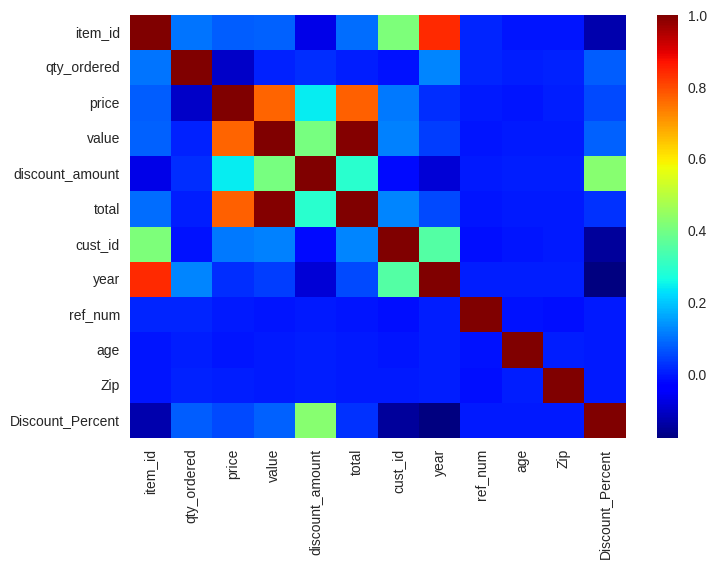

In [ ]:
sns.heatmap(df_AMZN_origin.corr(), cmap='jet')

Corroboramos si existen valores nulos en el dataframe. El resultado es negativo.

In [ ]:
df_AMZN_origin.isnull().sum()

order_id            0
order_date          0
status              0
item_id             0
sku                 0
qty_ordered         0
price               0
value               0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
cust_id             0
year                0
month               0
ref_num             0
Name Prefix         0
First Name          0
Middle Initial      0
Last Name           0
Gender              0
age                 0
full_name           0
E Mail              0
Sign in date        0
Phone No.           0
Place Name          0
County              0
City                0
State               0
Zip                 0
Region              0
User Name           0
Discount_Percent    0
dtype: int64

Creamos la siguiente columna para observar luego gráficamente la distribución de las categorías de los productos. Podemos determinar de manera muy clara cuáles son las que más compras reciben. 


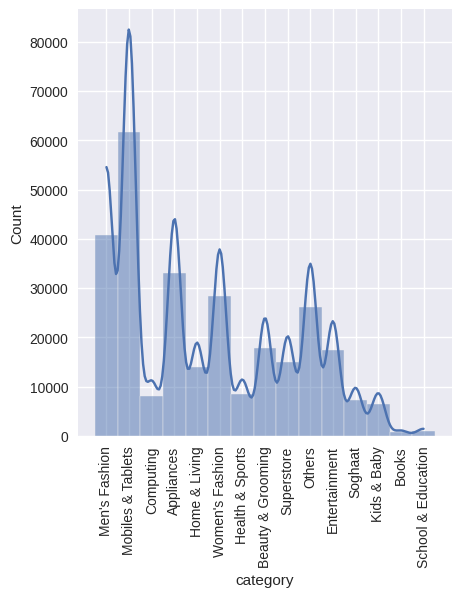

In [ ]:
column_cat = df_AMZN_origin['category'].dropna()
sns.displot(column_cat, kde=True)
plt.xticks(rotation=90)
plt.show()

Creamos la siguiente columna para observar luego gráficamente la distribución de las regiones de EEUU. Aquí observamos como se distribuyen las mismas en forma escalonada descendente, aunque en las dos últimas regiones los valores se igualan. 

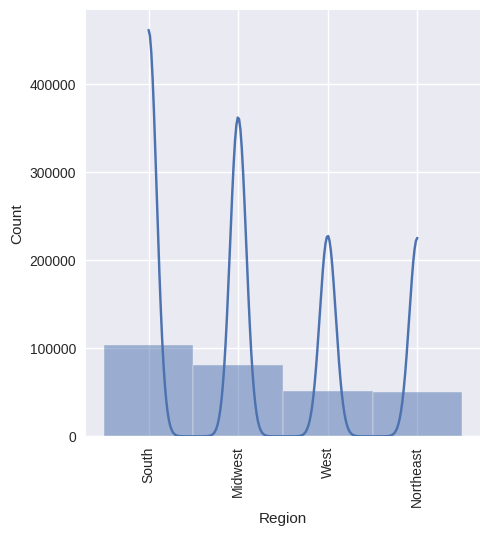

In [ ]:
column_region = df_AMZN_origin['Region'].dropna()
sns.displot(column_region, kde=True)
plt.xticks(rotation=90)
plt.show()

A continuación se realizan los siguientes gráficos de a pares, teniendo en cuenta las variables "Edad" y "Cantidad de órdenes", con respecto al género de los clientes. Podemos observar que a partir de los 60 años, son los hombres los que realizan mayor cantidad de órdenes. Sin embargo, a nivel general son muy parecidas las cantidades en ambos géneros. Podríamos tomar como outliers las órdenes superiores a 200 (cantidad).

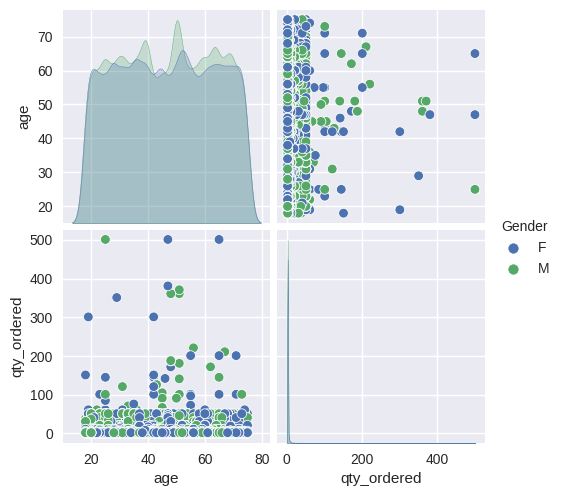

In [ ]:
sns.pairplot(df_AMZN_origin, vars = ["age", "qty_ordered"], hue = "Gender")

En el siguiente pairplot vemos como con respecto a la edad y género de los clientes, los hombres son los que realizan compras más costosas. Dicho de otra manera, generan mayores ganancias desde el lado del negocio. Podríamos tomar como outliers las compras que superan el monto de 20.000.

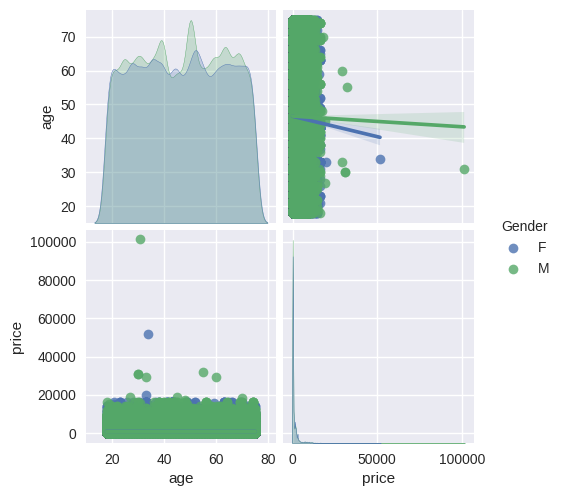

In [ ]:
sns.pairplot(df_AMZN_origin, vars = ["age", "price"], hue = 'Gender', kind = "reg")

In [ ]:
numeric_df_amzn = df_AMZN_origin.select_dtypes(include=np.number)
numeric_df_amzn.head()

,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent
0,574772,21,89.9,1798.0,0.0,1798.0,60124,2020,987867,43,73571,0.0
1,574774,11,19.0,190.0,0.0,190.0,60124,2020,987867,43,73571,0.0
2,574777,9,149.9,1199.2,0.0,1199.2,60124,2020,987867,43,73571,0.0
3,574779,9,79.9,639.2,0.0,639.2,60124,2020,987867,43,73571,0.0
4,595185,2,99.9,99.9,0.0,99.9,60124,2020,987867,43,73571,0.0


Creamos la siguiente columna para observar luego gráficamente la distribución en las edades de los clientes 


In [ ]:
column_age = numeric_df_amzn['age'].dropna()

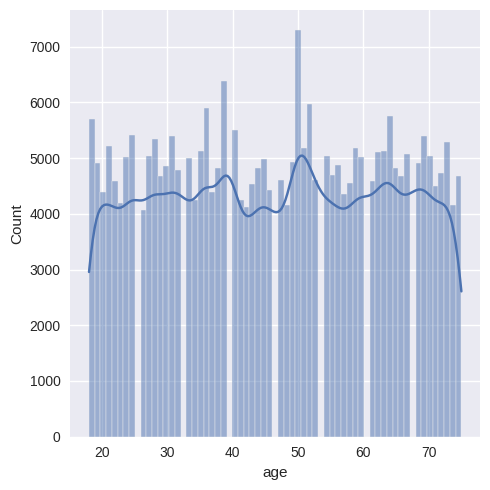

In [ ]:
sns.displot(column_age, kde=True)

Como el valor del skew da entre -0.5 y 0.5, entonces la columna "Edad"
cumple el supuesto de asimetría para una curva normal.

In [ ]:
from scipy.stats import skew, kurtosis
skew(column_age)

-0.008922624293110833

Como el valor de kurtosis no está entre 2 y 4, no cumple el supuesto de curva normal

In [ ]:
kurtosis(column_age, fisher = False)

1.806734952740596

In [ ]:
column_age.shape

(286392,)

A continuación vemos las medidas de tendencia central y de dispersión teniendo en cuenta la edad de los clientes.

In [ ]:
column_age.describe()

count    286392.000000
mean         46.489033
std          16.673288
min          18.000000
25%          32.000000
50%          47.000000
75%          61.000000
max          75.000000
Name: age, dtype: float64

En el gráfico observamos que no hay presencia de outliers para la edad.

<Axes: >

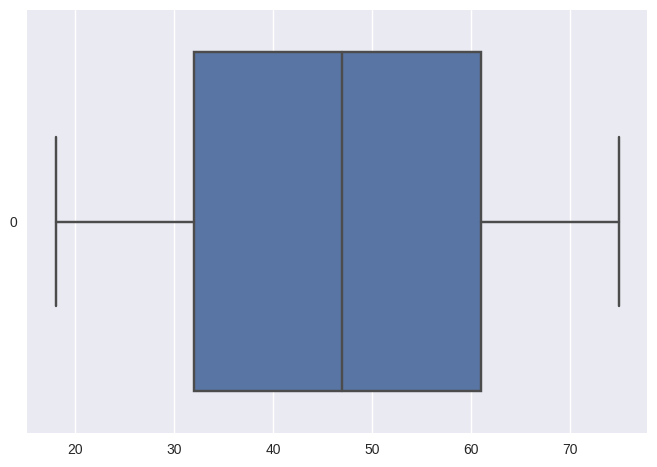

In [ ]:
sns.boxplot(column_age, orient='h')

Para calcular el rango intercuartil, es decir, la dispersión de los datos, realizamos la diferencia entre el 3º cuartil y el 1º cuartil.

In [ ]:
Q1 = column_age.quantile(.25)
Q1

32.0

In [ ]:
Q3 = column_age.quantile(.75)
Q3

61.0

In [ ]:
IQR = Q3 - Q1
IQR

29.0

In [ ]:
column_age.min()

18

In [ ]:
column_age.max()

75

Al ver que los valores mín (18) y max (75) se encuentran dentro de los límites inferior y superior, podemos inferir que no hay valores atípicos para la columna de la edad de los clientes.

In [ ]:
limiteinf = Q1 - 1.5*IQR
limitesup = Q3 + 1.5*IQR
limiteinf, limitesup

(-11.5, 104.5)

In [ ]:
columniqr = column_age[(column_age >= limiteinf) & (column_age < limitesup)] 
columniqr.describe()

count    286392.000000
mean         46.489033
std          16.673288
min          18.000000
25%          32.000000
50%          47.000000
75%          61.000000
max          75.000000
Name: age, dtype: float64